## Marthi et al. 2020: FRB20180916B (FRB180916.J0158+65)

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters

B:\dev\frbrepeaters\driftrate.py:169: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\frbrepeaters\driftrate.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


<ipython-input-1-4d1ff1ba89a9>:53: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


B:\dev\frbrepeaters\driftrate.py:48: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


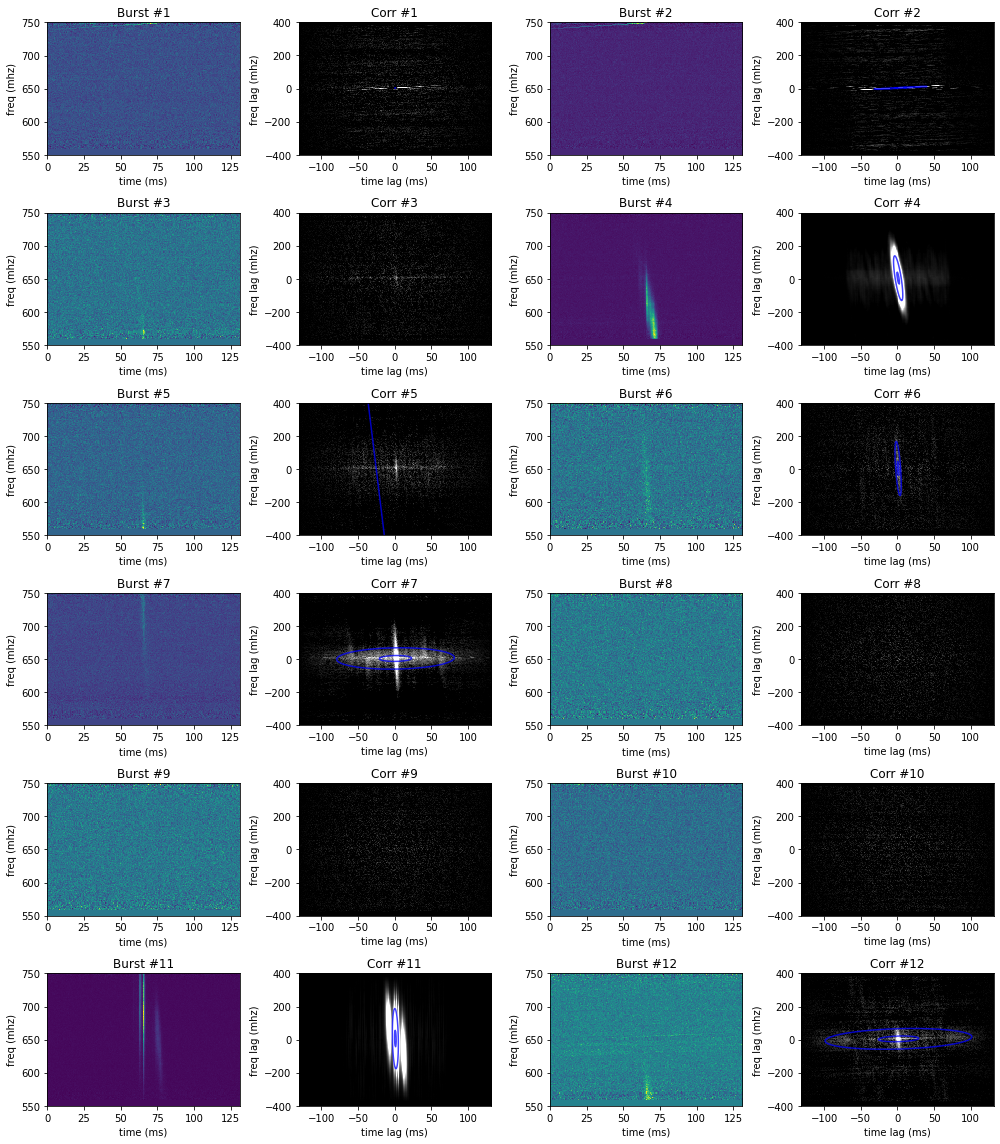

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters

# %matplotlib qt
%matplotlib inline

DM = 348.82       # pc/cm3
bwidth = 200   # mhz
df = bwidth / 2048   # mhz
dt = 327.68          # us
dt = 0.32768          # ms
lowest_freq = 550 # mhz

plt.figure(figsize=(14,16))
nrows, ncols = 6, 4
ploti = itertools.count(start=1, step=1)
burstnum = 1

for filename in glob.glob('data/marthi2020/DDTC123_24Mar2020/*.npy'):
    # print(f'loading {filename}')
    wfall = np.transpose(np.load(filename))
    wfall[:100] = 0
    wfall[2036:] = 0
    
    nfreq = 128
    tfac = 2
    wfall = driftrate.subsample(wfall, nfreq, wfall.shape[1]//tfac)
    wfall = driftrate.subtractbg(wfall, tleft=0, tright=100)
    ts = np.nanmean(wfall, axis=0)
    pkidx = np.nanargmax(ts)
   
    view = wfall[..., pkidx-100:pkidx+100]
    corr = driftrate.autocorr2d(view)
    print(f'type: {type(view)}\tshape: {view.shape}, type: {type(corr)}\tshape: {corr.shape}')
    drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, bwidth/nfreq, dt*tfac, lowest_freq, verbose=False)
    extents, corrextents = driftrate.getExtents(view, df=bwidth/nfreq, dt=dt*tfac, lowest_freq=lowest_freq)

    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
    plt.title(f'Burst #{burstnum}')
    plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')
    
    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
    plt.clim(0, np.max(corr)/20)
    plt.title(f'Corr #{burstnum}')
    plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

    burstnum += 1

plt.tight_layout()
# plt.savefig('MarthiBursts.pdf')
plt.show()


# Luo et al. 2020: FRB180301

/home/mohammed/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


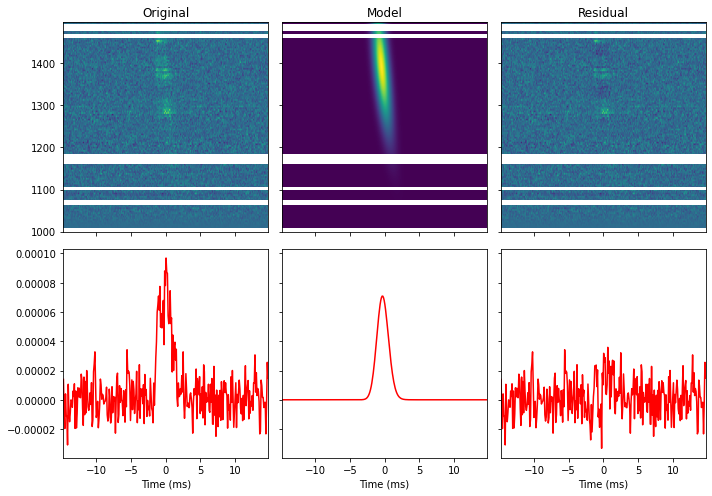

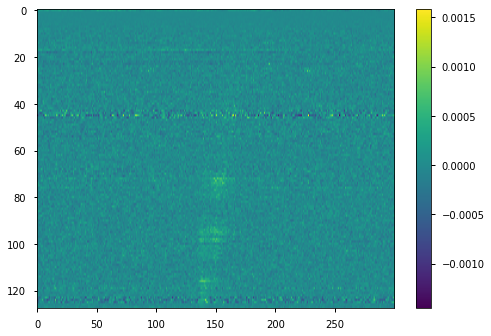

/home/mohammed/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


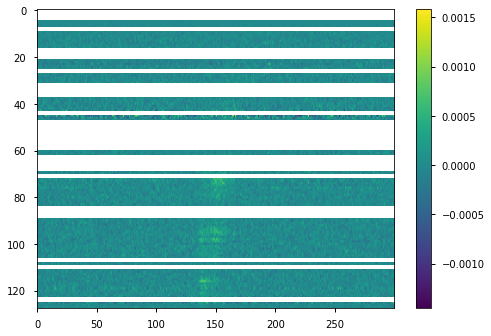

/home/mohammed/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/mnt/b/dev/burstfit/burstfit/utils/functions.py:150: RuntimeWarning: overflow encountered in exp
  B = np.exp((1 / 2) * (sigma / tau) ** 2)
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: overflow encountered in exp
  pulse[scat_idx] = A * B * np.exp(ln_C) * D
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: invalid value encountered in multiply
  pulse[scat_idx] = A * B * np.exp(ln_C) * D
/mnt/b/dev/burstfit/burstfit/utils/functions.py:278: RuntimeWarning: invalid value encountered in multiply
  model = l * spectra_from_fit[:, None]
/mnt/b/dev/burstfit/burstfit/utils/functions.py:155: RuntimeWarning: overflow encountered in multiply
  pulse[scat_idx] = A * B * np.exp(ln_C) * D


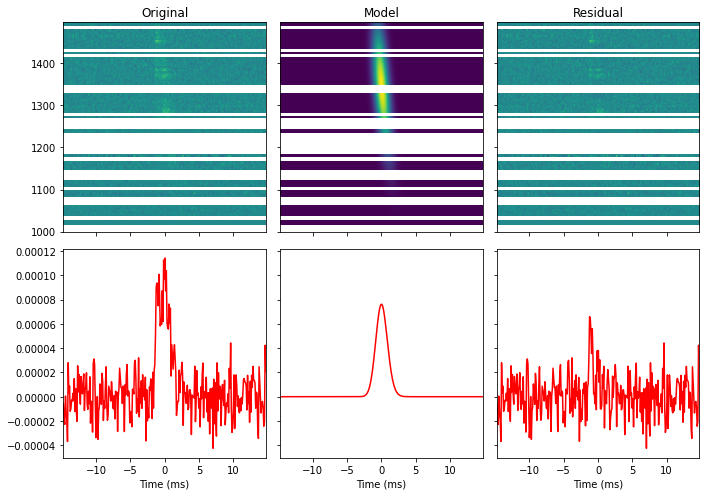

In [57]:
from burstfit.data import BurstData
from burstfit.fit import BurstFit
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me, plot_fit_results
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, gauss_norm, gauss_norm2
from your.utils.rfi import sk_sg_filter_raw

filename = 'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086_sub.npz'
data = np.load(filename)

def prep_mask(nfchans, mask_chans=[]):
    input_mask = np.zeros(nfchans, dtype="bool")
    for m in mask_chans:
        if isinstance(m, tuple) or isinstance(m, list):
            assert len(m) == 2
            input_mask[m[0] : m[1]] = True
        elif isinstance(m, int):
            input_mask[m] = True
    return input_mask
                
mask = prep_mask(data['wfall'].shape[0], [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119])
wfall = np.ma.array(data['wfall'], mask=False*np.ones(data['wfall'].shape))
wfall.mask[mask, :] = True
pkidx = np.nanargmax(np.nanmean(wfall, axis=0))
wfall = wfall[..., pkidx-150:pkidx+150]

# For pulse, we will use a gaussian convolved with an exponential model 
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)
sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, mask=mask)

bf = BurstFit(
    sgram_model=sgramModel,
    sgram=wfall,
    width=wfall.shape[0],
    dm=data['DM'],
    foff=3.91,
    fch1=data['dfs'][0],
    tsamp=0.0983/1000,
    mask=mask)

bf.validate()
bf.precalc()
bf.fitall(plot=False)
plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], bf.tsamp, bf.fch1, bf.foff, show=True, save=False)

## Using the noise removal stuff
view = data['wfall'][..., pkidx-150:pkidx+150]
plot_me(view)
sigma = 3
window = 15
mask = sk_sg_filter_raw(
    data=view.copy().T,
    foff=3.91,
    tsamp=0.0983/1000,
    spectral_kurtosis_sigma=sigma,
    savgol_frequency_window=window,
    savgol_sigma=sigma,
)
wfall2 = np.ma.array(view.copy(), mask=False*np.ones(view.copy().shape))
# mask = prep_mask(wfall2.shape[0], mask)
wfall2.mask[mask, :] = True
# wfall2[mask,:] = 0
plot_me(wfall2)

bf = BurstFit(
    sgram_model=sgramModel,
    sgram=wfall2,
    width=wfall2.shape[0],
    dm=data['DM'],
    foff=3.91,
    fch1=data['dfs'][0],
    tsamp=0.0983/1000,
    mask=mask)

bf.validate()
bf.precalc()
bf.fitall(plot=False)
plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], bf.tsamp, bf.fch1, bf.foff, show=True, save=False)


In [83]:
masks = {
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0086_sub.npz': [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0254_sub.npz': [43, 44, 46, 45, 119, 120, 124, 123, 125, 121, 122, 24, 23, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0260_sub.npz': [42, 44, 43, 45, 46, 125, 122, 124, 123, 119, 121, 120, 40, 41, 1, 0, 49, 25, 23], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20190716-M07_0409_sub.npz': [22, 23, 119, 120, 125, 124, 123, 29, 45, 46, 0, 43, 44], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0030_sub.npz': [126, 125, 127, 0, 45, 47, 46], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0520_sub.npz': [120, 119, 47, 46, 44, 45, 43, 41, 62, 50, 49], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_0621_sub.npz': [51, 50, 52, 46, 45, 62, 119, 120, 123, 122, 124, 126, 125, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1003_sub.npz': [119, 120, 68, 70, 69, 67, 52, 54, 53, 44, 46, 45, 43, 35, 116], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1463_sub.npz': [23, 22, 68, 69, 71, 125, 124, 123, 120, 118, 119, 122, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191007-M01_1481_sub.npz': [124, 123, 125, 119, 121, 120, 122, 1, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0098a_sub.npz': [1, 45, 46, 120, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0098b_sub.npz': [1, 45, 46, 120, 0], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0334_sub.npz': [123, 125, 124, 43, 44, 45, 46, 0, 120, 119], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_0850_sub.npz': [119, 121, 120, 26, 62, 44, 45, 47, 46, 27, 23], 
    'B:\\dev\\frbrepeaters\\data\\luo2020\\180813_ar_file\\ar_file\\converted\\FRB180301_20191008-M01_1509_sub.npz': [119, 120, 68, 44, 46, 45, 23, 43]
}

np.save('luomasks.npy', [masks])
stuff = np.load('luomasks.npy', allow_pickle=True)[0]
type(stuff)

dict

shape: (128, 298), 	shape: (255, 595)
shape: (128, 288), 	shape: (255, 575)
shape: (128, 187), 	shape: (255, 373)
shape: (128, 284), 	shape: (255, 567)


B:\dev\frbrepeaters\driftrate.py:48: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
B:\dev\frbrepeaters\driftrate.py:304: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


shape: (128, 282), 	shape: (255, 563)
shape: (128, 280), 	shape: (255, 559)


B:\dev\frbrepeaters\driftrate.py:50: RuntimeWarning: invalid value encountered in sqrt
  width_y = np.sqrt(abs((np.arange(row.size)-x)**2*row).sum()/row.sum())


shape: (128, 278), 	shape: (255, 555)
shape: (128, 276), 	shape: (255, 551)
shape: (128, 274), 	shape: (255, 547)
shape: (128, 272), 	shape: (255, 543)
shape: (128, 270), 	shape: (255, 539)
shape: (128, 268), 	shape: (255, 535)
shape: (128, 266), 	shape: (255, 531)
shape: (128, 264), 	shape: (255, 527)
shape: (128, 236), 	shape: (255, 471)


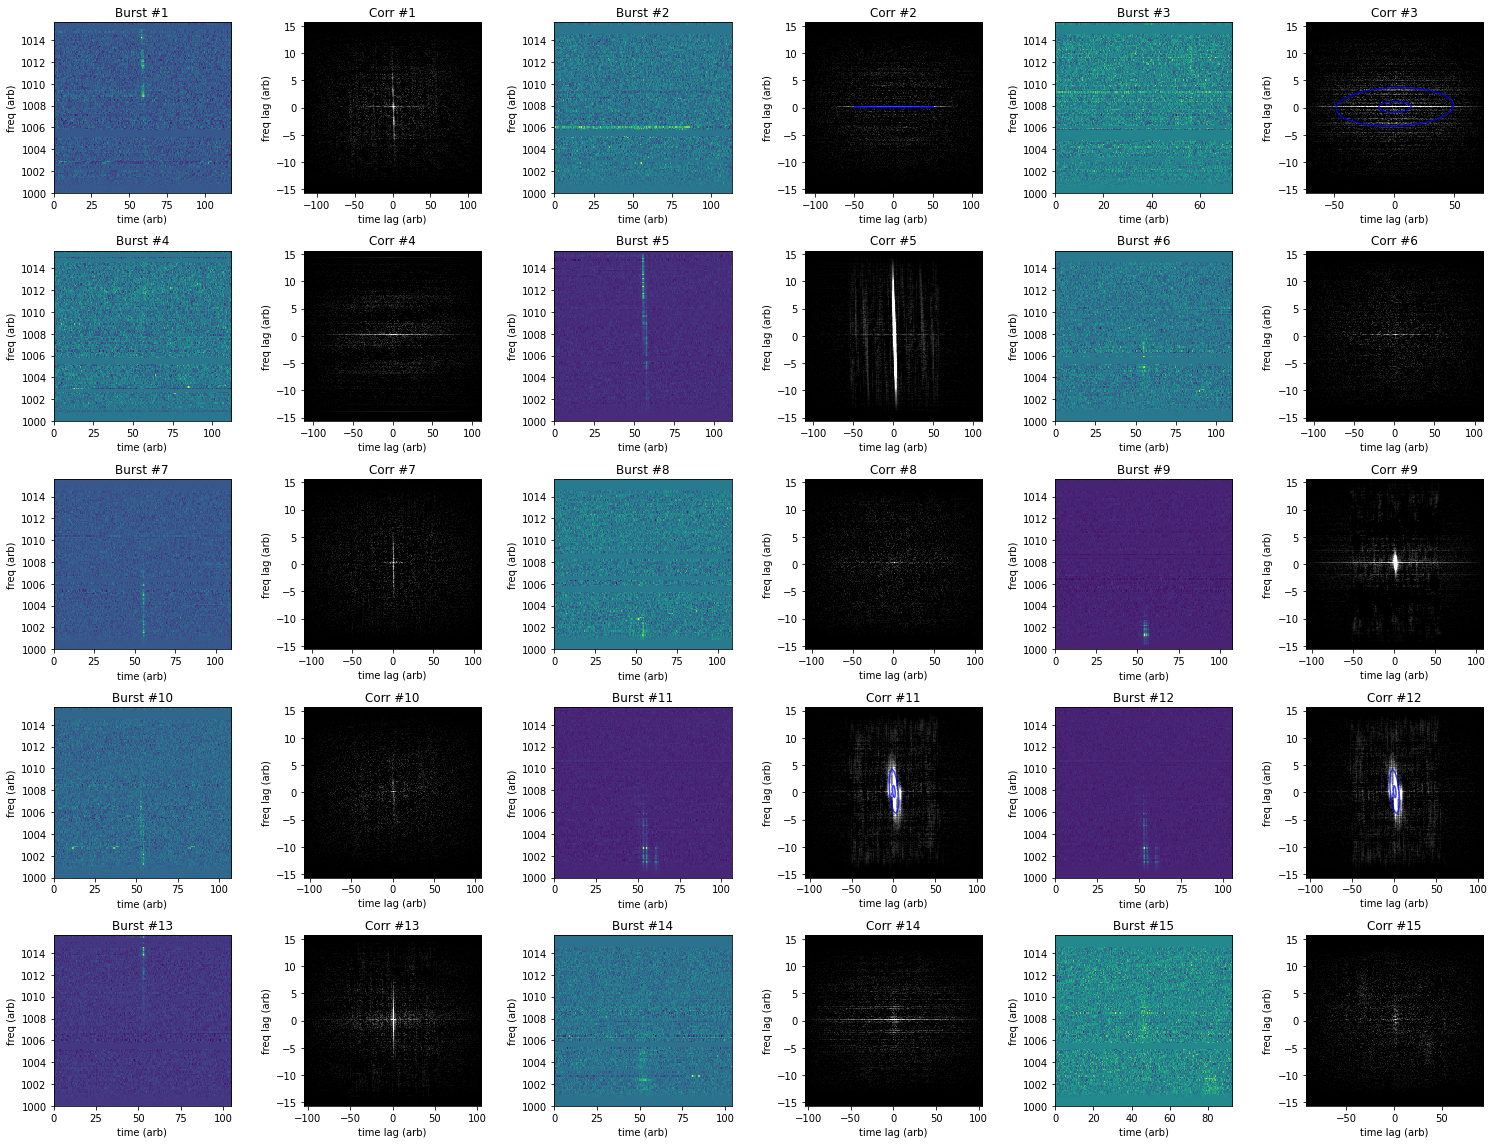

In [21]:
def loadluodata_raw(filename):
    ar = pypulse.Archive(filename, prepare=True)
    wfall = ar.getData()
    burstmetadata = {
        'dt'        : ar.getTimes(),
        'dfs'       : ar.getFreqs(),
        'DM'        : ar.getDM(),
        'bandwidth' : ar.getBandwidth(),
        'duration'  : ar.getDuration(),
        'center_f'  : ar.getCenterFrequency(),
        'freq_unit' : ar.getFrequencyUnit(),
        'time_unit' : ar.getTimeUnit(),
        'int_unit'  : ar.getIntensityUnit(),
        'telescope' : ar.getTelescope(),
        'burstSN'   : ar.getSN(),
        'raw_shape' : wfall.shape
    }
    
    subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//4)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    np.save(filename.split('.')[0] + '_sub.npy', subfall)    
    np.savez(filename.split('.')[0] + '_sub.npz', wfall=subfall, **burstmetadata)

    return subfall, pkidx, wfall, burstmetadata

def loadluodata_npz(filename):
    obsdata = np.load(filename)
    wfall = obsdata['wfall']
    for mask in masks[filename]:
        wfall[mask] = 0
    subfall = driftrate.subsample(wfall, 128, 7168//4)
    # subfall = driftrate.subtractbg(subfall, tleft=0, tright=10)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    return subfall, pkidx, wfall, obsdata

masks = {
    'shape': (128, 7168),
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086_sub.npz': [125, 124, 123, 45, 44, 42, 43, 46, 26, 18, 17, 1, 0, 119], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0254_sub.npz': [43, 44, 46, 45, 119, 120, 124, 123, 125, 121, 122, 24, 23, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0260_sub.npz': [42, 44, 43, 45, 46, 125, 122, 124, 123, 119, 121, 120, 40, 41, 1, 0, 49, 25, 23], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0409_sub.npz': [22, 23, 119, 120, 125, 124, 123, 29, 45, 46, 0, 43, 44], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0030_sub.npz': [126, 125, 127, 0, 45, 47, 46], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0520_sub.npz': [120, 119, 47, 46, 44, 45, 43, 41, 62, 50, 49], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_0621_sub.npz': [51, 50, 52, 46, 45, 62, 119, 120, 123, 122, 124, 126, 125, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1003_sub.npz': [119, 120, 68, 70, 69, 67, 52, 54, 53, 44, 46, 45, 43, 35, 116], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1463_sub.npz': [23, 22, 68, 69, 71, 125, 124, 123, 120, 118, 119, 122, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191007-M01_1481_sub.npz': [124, 123, 125, 119, 121, 120, 122, 1, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0098a_sub.npz': [1, 45, 46, 120, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0098b_sub.npz': [1, 45, 46, 120, 0], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0334_sub.npz': [123, 125, 124, 43, 44, 45, 46, 0, 120, 119], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_0850_sub.npz': [119, 121, 120, 26, 62, 44, 45, 47, 46, 27, 23], 
    'data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20191008-M01_1509_sub.npz': [119, 120, 68, 44, 46, 45, 23, 43]
}

# driftrate.plotStampcard(loadluodata_raw, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.rf', figsize=(21, 16), nrows=5, ncols=6)
driftrate.plotStampcard(loadluodata_npz, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.npz', figsize=(21, 16), nrows=5, ncols=6)

In [6]:
ar = pypulse.Archive('data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf', prepare=True, thread=True)

Loading: data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf
Load time: 28.43 s


In [19]:
dt, dfs = ar.getAxis('T'), ar.getAxis('F')
dt
# dt, dfs, luoDM = ar.getTimes(), ar.getFreqs(), ar.getDM(), ar.getBandwidth(), ar.getDuration(), ar.getCenterFrequency()
luometadata = {
    'dt'        : ar.getTimes(),
    'dfs'       : ar.getFreqs(),
    'DM'        : ar.getDM(),
    'bandwidth' : ar.getBandwidth(),
    'duration'  : ar.getDuration(),
    'center_f'  : ar.getCenterFrequency(),
    'freq_unit' :ar.getFrequencyUnit(),
    'time_unit' :ar.getTimeUnit(),
    'int_unit'  :ar.getIntensityUnit(),
    'telescope' :ar.getTelescope(),
    'burstSN'   :ar.getSN(),
}
print(metadata)
print(ar.getData().shape, dfs[1]-dfs[0], (dfs[-1] - dfs[0])/len(dfs))
timeres = metadata['dt'][0] / ar.getData().shape[1]

{'dt': array([0.70464307]), 'dfs': array([1000.        , 1000.12207031, 1000.24414062, ..., 1499.63378906,
       1499.75585938, 1499.87792969]), 'DM': 518.3, 'bandwidth': 500.0, 'duration': 1.409286144, 'center_f': 1250.0, 'freq_unit': 'MHz', 'time_unit': 'SEC', 'int_unit': 'Jy', 'telescope': 'FAST', 'burstSN': 5.30820815917212}
(4096, 28672) 0.1220703125 0.1220405101776123


2.4576e-05

In [70]:
wfall.shape[0] / subfall.shape[0], wfall.shape[1] / subfall.shape[1], wfall.shape, subfall.shape
dfs

array([1000.        , 1000.12207031, 1000.24414062, ..., 1499.63378906,
       1499.75585938, 1499.87792969])

resolution:  3.9052963256835938 0.098304
(4096, 28672) (128, 7168)


B:\dev\frbrepeaters\driftrate.py:169: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\frbrepeaters\driftrate.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


3584 6990
-138.19733236371127 0.27189594999046607


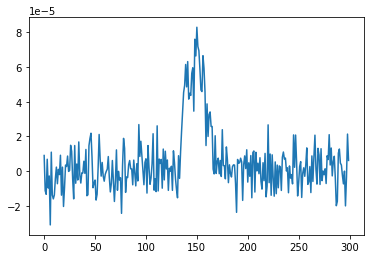

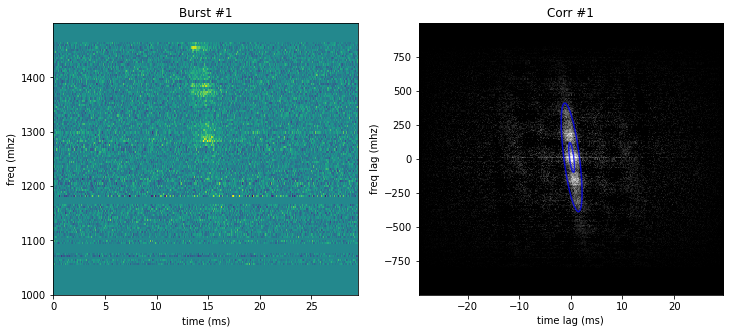

In [17]:
# Single burst
# dt, dfs = ar.getAxis('T'), ar.getAxis('F')
# luometadata = {
#     'dt'        : ar.getTimes(),
#     'dfs'       : ar.getFreqs(),
#     'DM'        : ar.getDM(),
#     'bandwidth' : ar.getBandwidth(),
#     'duration'  : ar.getDuration(),
#     'center_f'  : ar.getCenterFrequency(),
#     'freq_unit' :ar.getFrequencyUnit(),
#     'time_unit' :ar.getTimeUnit(),
#     'int_unit'  :ar.getIntensityUnit(),
#     'telescope' :ar.getTelescope(),
#     'burstSN'   :ar.getSN(),
# }

# DM = 518.3       # pc/cm3
# bwidth = 500   # mhz
# df = (dfs[-1] - dfs[0])/len(dfs)   # mhz
# dt = metadata['dt'][0] / ar.getData().shape[1] # us
# dt = dt*1000          # ms
# lowest_freq = 1000 # mhz

# subfall, pkidx, wfall, obsdata = loadluodata_raw('data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0086.rf')
# subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//14)
subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//4)

downf, downt = wfall.shape[0] / subfall.shape[0], wfall.shape[1] / subfall.shape[1]
DM = obsdata['DM']       # pc/cm3
bwidth = obsdata['bandwidth']   # mhz
dfs = obsdata['dfs']
df = (dfs[-1] - dfs[0])/len(dfs) * downf  # mhz

dt = obsdata['dt'][0] / wfall.shape[1]  * downt # s
dt = dt*1000          # ms
lowest_freq = 1000 # mhz
print('resolution: ', df, dt)

%matplotlib inline

# Burst 3 noise
# subfall[0:4]     = 0
# subfall[39:50]   = 0
# subfall[23:24]   = 0
# subfall[119:128] = 0

# Burst 1 noise
subfall[0:14] = 0
subfall[17:18] = 0
subfall[26] = 0
subfall[20:24] = 0
subfall[43:46] = 0
subfall[119:128] = 0

# subfall = driftrate.subtractbg(subfall, tleft=0, tright=5)
ts = np.nanmean(subfall, axis=0)
pkidx = np.nanargmax(ts)
print(wfall.shape, subfall.shape)
view = subfall[..., pkidx-150:pkidx+150]
# view = wfall # don't do this, its too much data
corr = driftrate.autocorr2d(view)

drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, df, dt, lowest_freq, verbose=False)
extents, corrextents = driftrate.getExtents(view, df=df, dt=dt, lowest_freq=lowest_freq)

print(pkidx, 6990)
plt.plot(ts[pkidx-150:pkidx+150])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
plt.title(f'Burst #{1}')
plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')

plt.subplot(1, 2, 2)
plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
plt.clim(0, np.max(corr)/20)
plt.title(f'Corr #{1}')
plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
if popt[0] > 0:
    plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

# plt.figure(figsize=(12,12))
# plt.imshow(view, origin='lower', aspect='auto', interpolation='none')
# plt.show()
# plt.imshow(corr, origin='lower', aspect='auto', interpolation='none')
# plt.show()
print(drift, drift_error)

In [27]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()
ax.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
# ax.clim(0, np.max(corr)/20)
if popt[0] > 0:
    ax.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')
ax.axis('off')
canvas.draw()
np.fromstring(canvas.tostring_rgb(), dtype='uint8')

<ipython-input-27-31f986cd5ada>:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(canvas.tostring_rgb(), dtype='uint8')


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

## Oostrum et al. 2020: FRB20121102A and FRB180814.J0422+73

<ipython-input-2-2d84867b63f3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,4))


Loading: data/oostrum2020/R1_frb121102\R1_B30.rf
Load time: 4.20 s


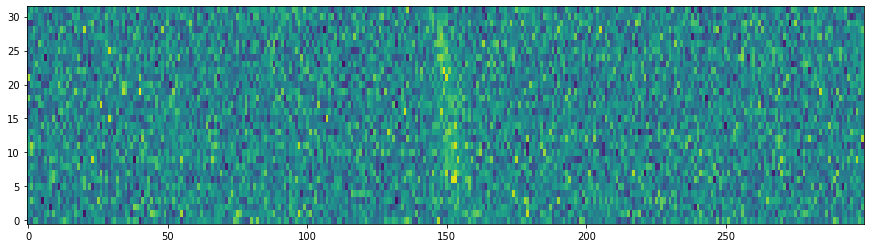

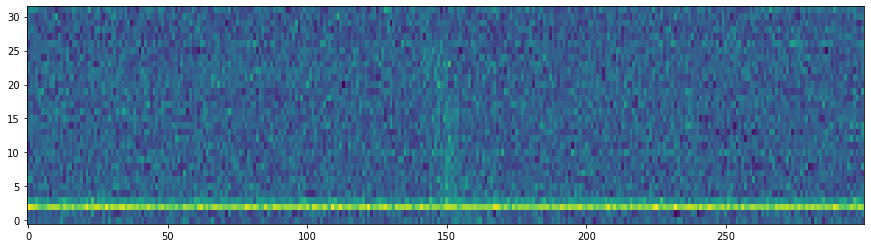

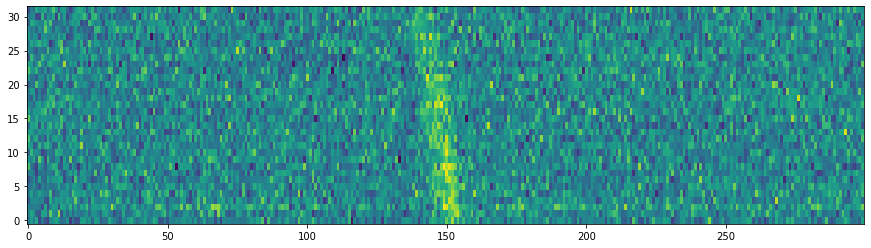

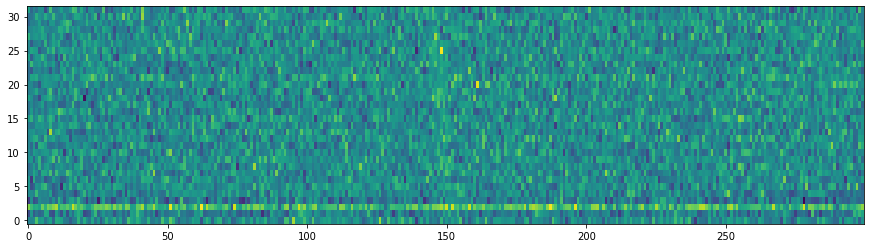

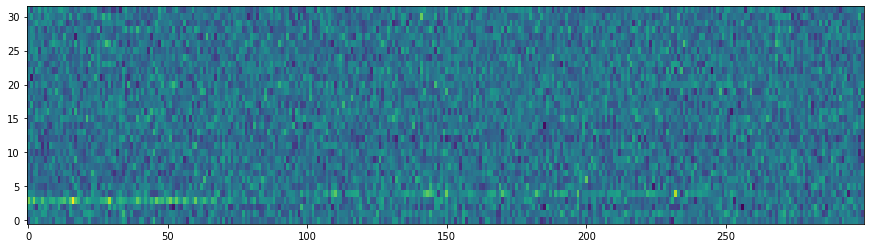

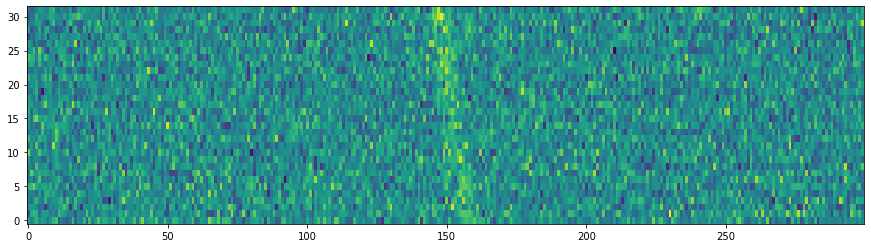

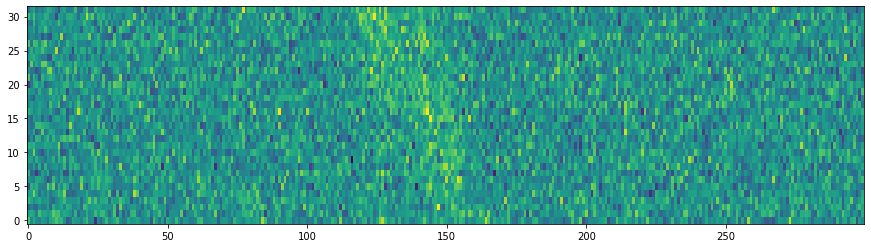

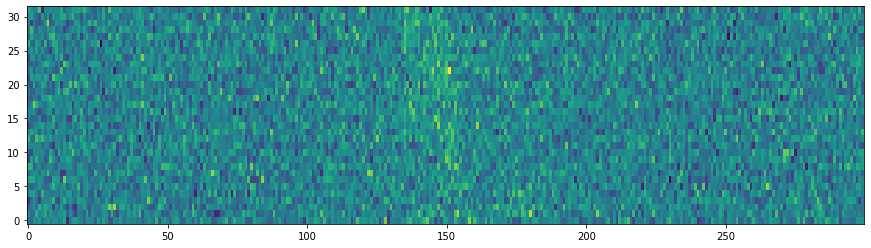

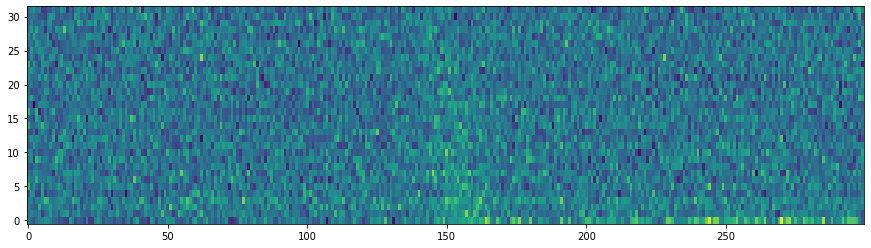

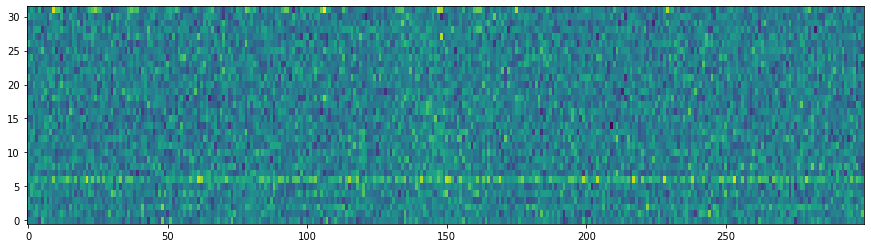

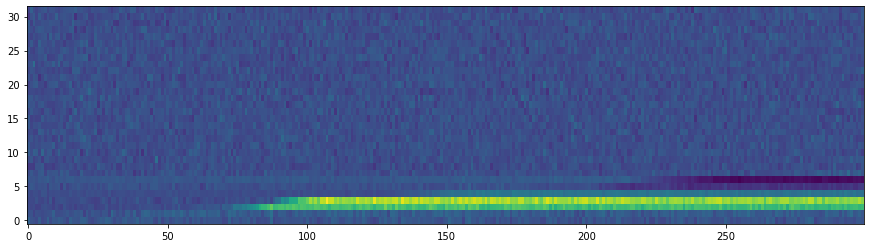

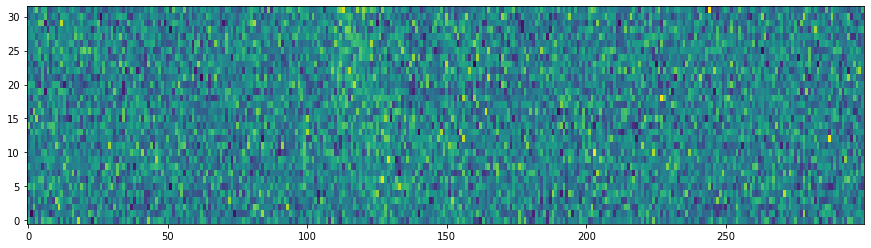

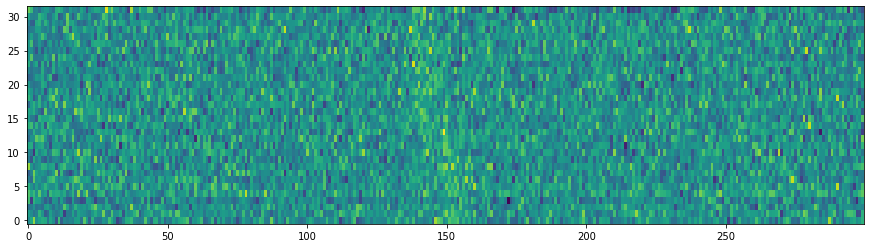

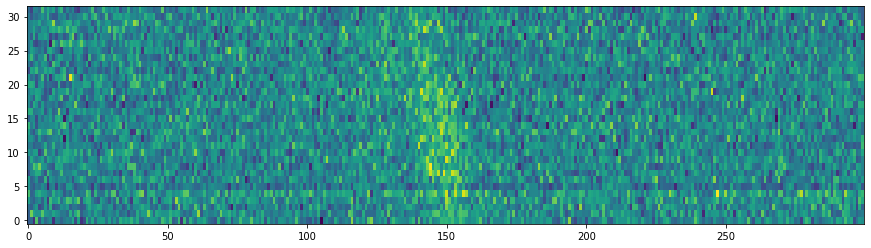

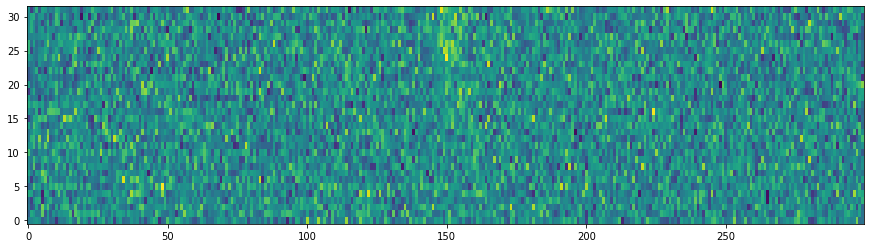

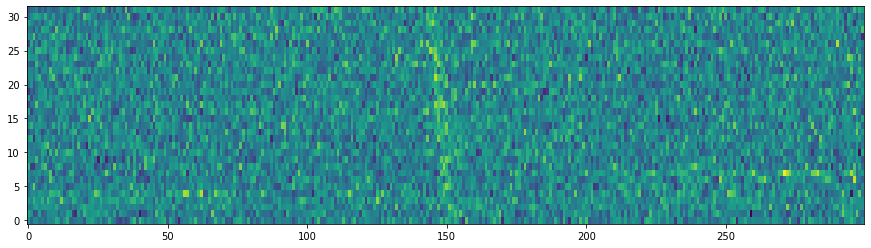

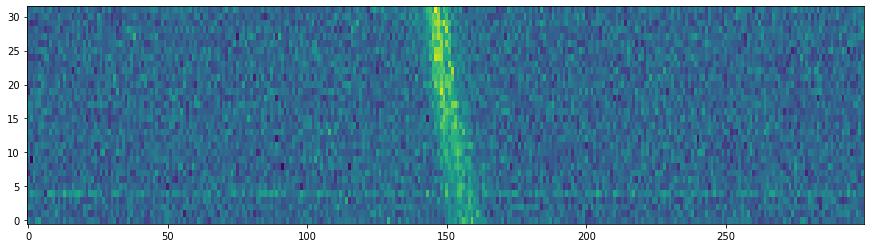

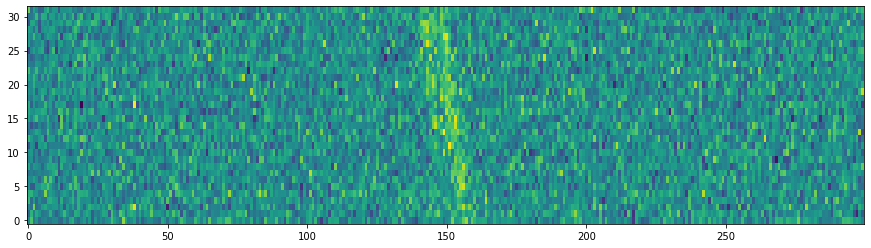

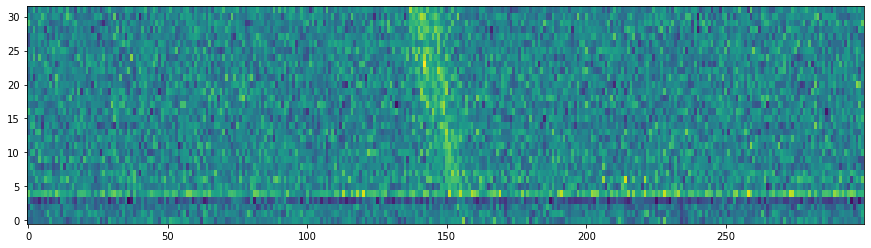

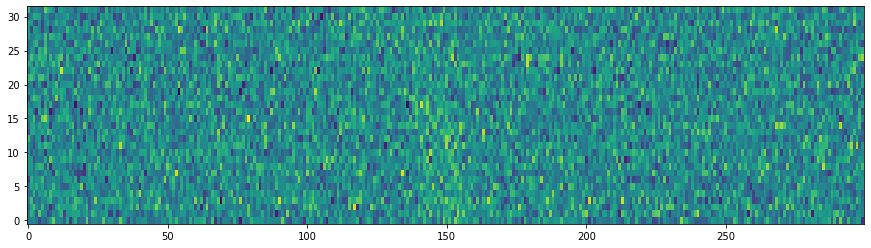

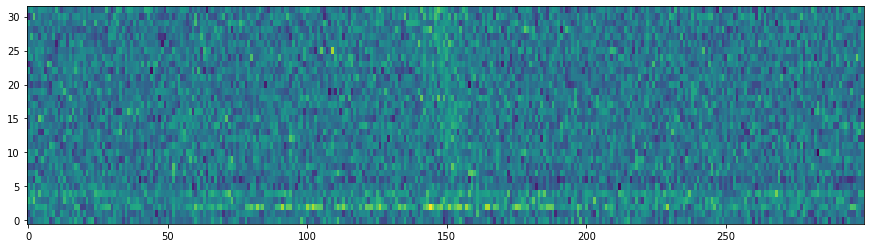

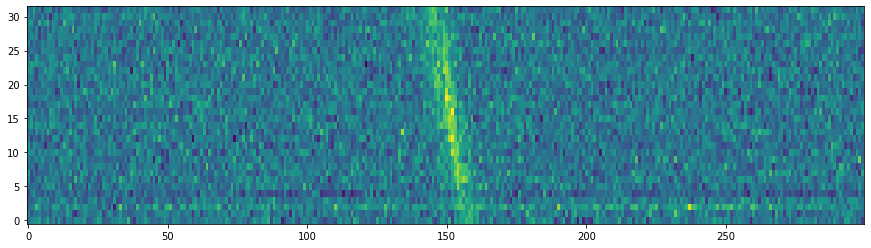

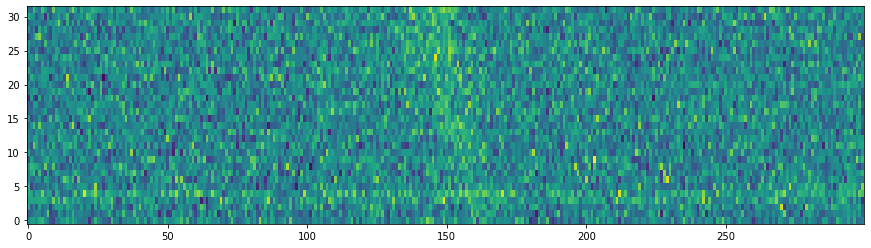

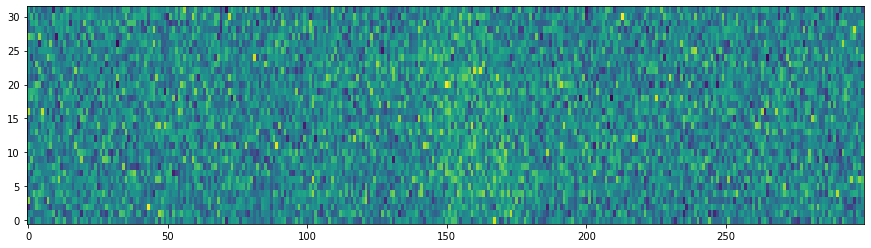

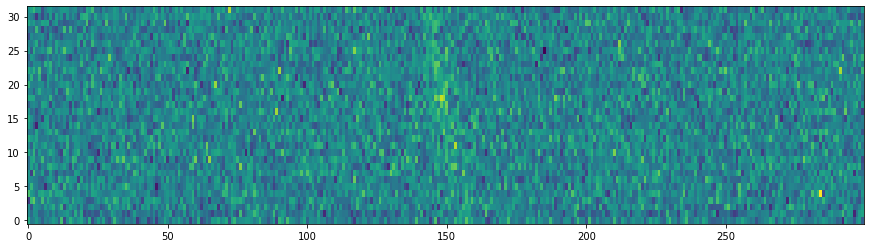

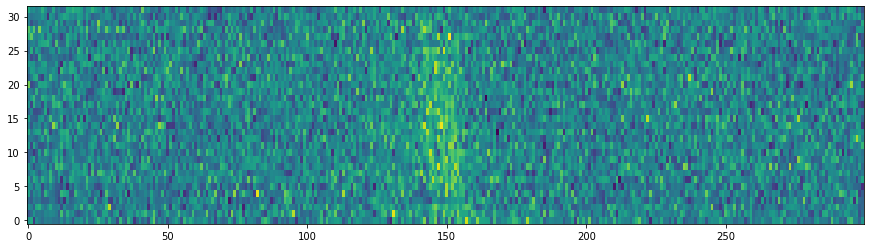

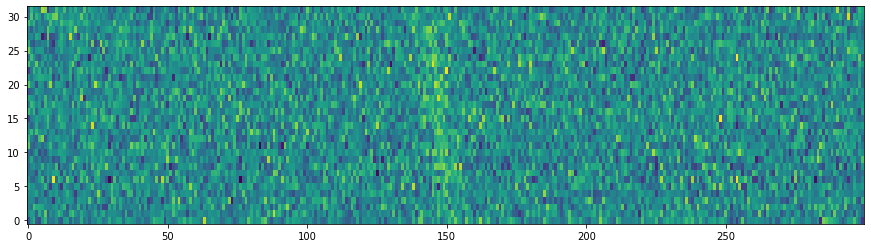

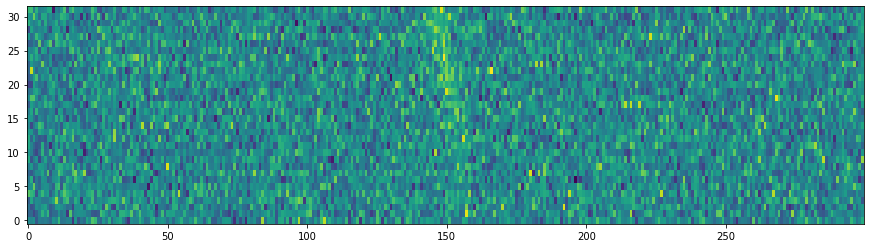

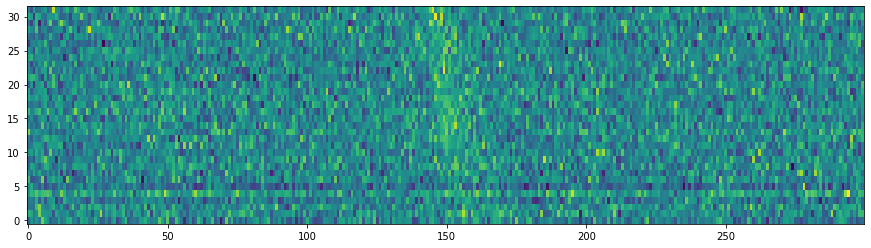

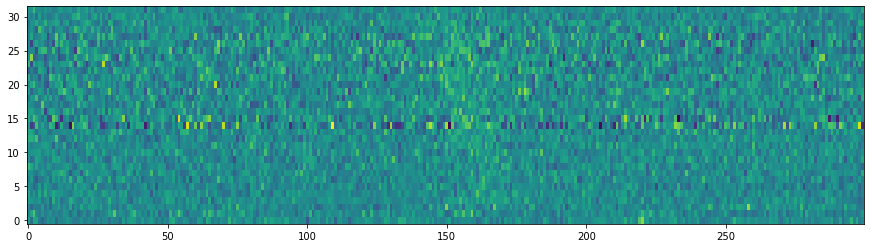

In [2]:
#filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'
for filename in glob.glob('data/oostrum2020/R1_frb121102/*.rf'):
    #filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'

    subfall, pkidx = frbrepeaters.loadpsrfits(filename)
    width = 150
    plt.figure(figsize=(15,4))
    plt.imshow(subfall[:, pkidx-width:pkidx+width], origin='lower', interpolation='none', aspect='auto')